In [22]:
import tensorflow as tf
from tensorflow import  keras
import pandas as pd
import numpy as np
import seaborn as sns

In [56]:
train_df = pd.read_csv("https://raw.githubusercontent.com/KeithGalli/neural-nets/master/examples/clusters_two_categories/data/train.csv")
train_df.head()

,x,y,color,marker
0,-0.765775,1.006452,red,^
1,0.229016,0.094320,red,^
2,0.189987,1.589141,red,^
3,0.580085,0.520488,red,^
4,0.292287,0.317852,red,^


In [57]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       6000 non-null   float64
 1   y       6000 non-null   float64
 2   color   6000 non-null   object 
 3   marker  6000 non-null   object 
dtypes: float64(2), object(2)
memory usage: 187.6+ KB


In [58]:
unique_c = train_df["color"].unique()
unique_colors = list(unique_c)
unique_colors

['red', 'blue', 'green', 'teal', 'orange', 'purple']

In [59]:
unique_m = train_df["marker"].unique()
unique_markers = list(unique_m)
unique_markers

['^', '+', '*']

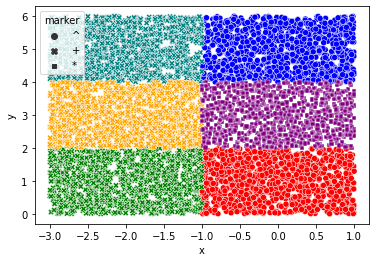

In [60]:
sns.scatterplot(data=train_df, x='x', y='y', style='marker',c=train_df["color"])

In [70]:
# train_df["encoded_color"] = train_df["color"].apply(lambda color : unique_colors.index(color))
# train_df["encoded_marker"] = train_df["marker"].apply(lambda marker : unique_markers.index(marker))
# train_df.head()

one_hot_labels= pd.get_dummies(train_df[["color","marker"]]).values
one_hot_labels

array([[0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 1, 0, 0]], dtype=uint8)

In [64]:
np.random.RandomState(seed=42).shuffle(train_df[["x","y"]].values)
np.random.RandomState(seed=42).shuffle(one_hot_labels)

In [72]:
model = keras.Sequential([
    keras.layers.Input(shape=(2,)),
    keras.layers.Dense(32,activation="relu"),
    keras.layers.Dense(32,activation="relu"),
    keras.layers.Dense(9,activation="sigmoid")   
])

model.compile(optimizer="adam",
              loss=keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=[keras.metrics.BinaryAccuracy()])

model.fit(train_df[["x","y"]].values,one_hot_labels,batch_size=4,epochs=10)

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1500/1500 [==============================] - 3s 2ms/step - loss: 0.2571 - binary_accuracy: 0.8817
Epoch 2/10
1500/1500 [==============================] - 2s 2ms/step - loss: 0.1087 - binary_accuracy: 0.9597
Epoch 3/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0685 - binary_accuracy: 0.9783
Epoch 4/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0526 - binary_accuracy: 0.9825
Epoch 5/10
1500/1500 [==============================] - 2s 2ms/step - loss: 0.0435 - binary_accuracy: 0.9863
Epoch 6/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0378 - binary_accuracy: 0.9882
Epoch 7/10
1500/1500 [==============================] - 2s 2ms/step - loss: 0.0341 - binary_accuracy: 0.9888
Epoch 8/10
1500/1500 [==============================] - 2s 2ms/step - loss: 0.0314 - binary_accuracy: 0.9891
Epoch 9/10
1500/1500 [==============================] - 2s 2ms/step - loss: 0.0291 - binary_accuracy: 0.9899
Epoch 10/10
1500/1500 [=======

In [73]:
test_df = pd.read_csv("https://raw.githubusercontent.com/KeithGalli/neural-nets/master/examples/clusters_two_categories/data/test.csv")
test_df.head()

,x,y,color,marker
0,-0.129697,0.773598,red,^
1,0.341569,0.505299,red,^
2,0.168562,1.397924,red,^
3,-0.738458,0.097241,red,^
4,0.311101,1.669878,red,^


In [74]:
one_hot_test_labels= pd.get_dummies(test_df[["color","marker"]]).values
one_hot_test_labels

array([[0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 1, 0, 0]], dtype=uint8)

In [75]:
model.evaluate(test_df[["x","y"]].values,one_hot_test_labels)

38/38 [==============================] - 0s 1ms/step - loss: 0.0262 - binary_accuracy: 0.9900


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


[0.02621200680732727, 0.9900001287460327]

In [88]:
prediction = model.predict(np.array([[-1,2],[-2,5]]))
R = unique_colors +  unique_markers
pred = (-prediction).argsort(axis=-1)[:, :2]

for p in pred :
  for i in p :
    print(R[i],end=" ")
  print("")

+ orange 
+ purple 
